In [5]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [6]:
df=pd.read_csv('D:/Semester 8/NLP/IA/sentimentanalyis_1-main/Labelling reviews/labelled_reviews2.csv')

train, test = train_test_split(df, test_size=0.2, random_state=25)

In [7]:
train.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,reviews,new_reviews,Positive,Negative,Neutral,Compound,Sentiment
9351,9523,9523,9523,\nAwesome product\n,awesome product,0.804,0.0,0.196,0.6249,0
2779,2842,2842,2842,\nnice product... ....quality is too good........,nice product quality goodgive efficient space ...,0.444,0.0,0.556,0.6808,0
3104,3169,3169,3169,\nActually it is not suitable for kids who is ...,actually suitable kid 3 yrs old issue material...,0.000,0.0,1.000,0.0000,0
1848,1879,1879,1879,\nNice bag\n,nice bag,0.737,0.0,0.263,0.4215,0
1863,1895,1895,1895,\nGood\n,good,1.000,0.0,0.000,0.4404,0


In [8]:
test.tail()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,reviews,new_reviews,Positive,Negative,Neutral,Compound,Sentiment
8971,9140,9140,9140,\nThe bag is awesome I got it for ₹560 on Amaz...,bag awesome get 560 amazon good price bag offe...,0.622,0.000,0.378,0.9300,0
2204,2258,2258,2258,\nVery good product.My son likes this very muc...,good productmy son like muchgood class 3 upto ...,0.435,0.000,0.565,0.6597,0
6816,6959,6959,6959,\nThis product is superb quality as shown in t...,product superb quality show picture nice love,0.735,0.000,0.265,0.9022,0
8219,8387,8387,8387,\nthe price is damn good for the product looks...,price damn good product look sturdywill use co...,0.230,0.214,0.556,0.0516,0
4990,5108,5108,5108,\nWriting this review after 1 year of use.Awes...,write review 1 year useawesome material stitch...,0.306,0.000,0.694,0.5938,0


In [9]:
# positive reviews
sum(train["Sentiment"] == 0)

6587

In [10]:
# negative reviews
sum(train["Sentiment"] == 1)


975

In [11]:
# check if there are any missing values
train.isnull().sum()

Unnamed: 0.2    0
Unnamed: 0.1    0
Unnamed: 0      0
reviews         0
new_reviews     0
Positive        0
Negative        0
Neutral         0
Compound        0
Sentiment       0
dtype: int64

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 


import re #for regular expressions
import nltk #for text manipulation
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# extract the labels from the train data
y = train.Sentiment.values

# use 70% for the training and 30% for the test
x_train, x_test, y_train, y_test = train_test_split(train.new_reviews.values, y, 
                                                    stratify=y, 
                                                    random_state=1, 
                                                    test_size=0.3, shuffle=True)

In [ ]:
documents = ["This is Import Data's Youtube channel",
             "Data science is my passion and it is fun!",
             "Please subscribe to my channel"]

# initializing the countvectorizer
vectorizer = CountVectorizer()

# tokenize and make the document into a matrix
document_term_matrix = vectorizer.fit_transform(documents)

# check the result
pd.DataFrame(document_term_matrix.toarray(), columns = vectorizer.get_feature_names())

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

# vectorize tweets for model building
vectorizer = CountVectorizer(binary=True, stop_words='english')

# learn a vocabulary dictionary of all tokens in the raw documents
vectorizer.fit(list(x_train) + list(x_test))

# transform documents to document-term matrix
x_train_vec = vectorizer.transform(x_train)
x_test_vec = vectorizer.transform(x_test)

SVM model

In [16]:
from sklearn import svm
# classify using support vector classifier
svm = svm.SVC(kernel = 'linear', probability=True)

# fit the SVC model based on the given training data
prob = svm.fit(x_train_vec, y_train).predict_proba(x_test_vec)

# perform classification and prediction on samples in x_test
y_pred_svm = svm.predict(x_test_vec)

In [17]:
from sklearn.metrics import accuracy_score
print("Accuracy score for SVC is: ", accuracy_score(y_test, y_pred_svm) * 100, '%')


Accuracy score for SVC is:  96.38607315998236 %


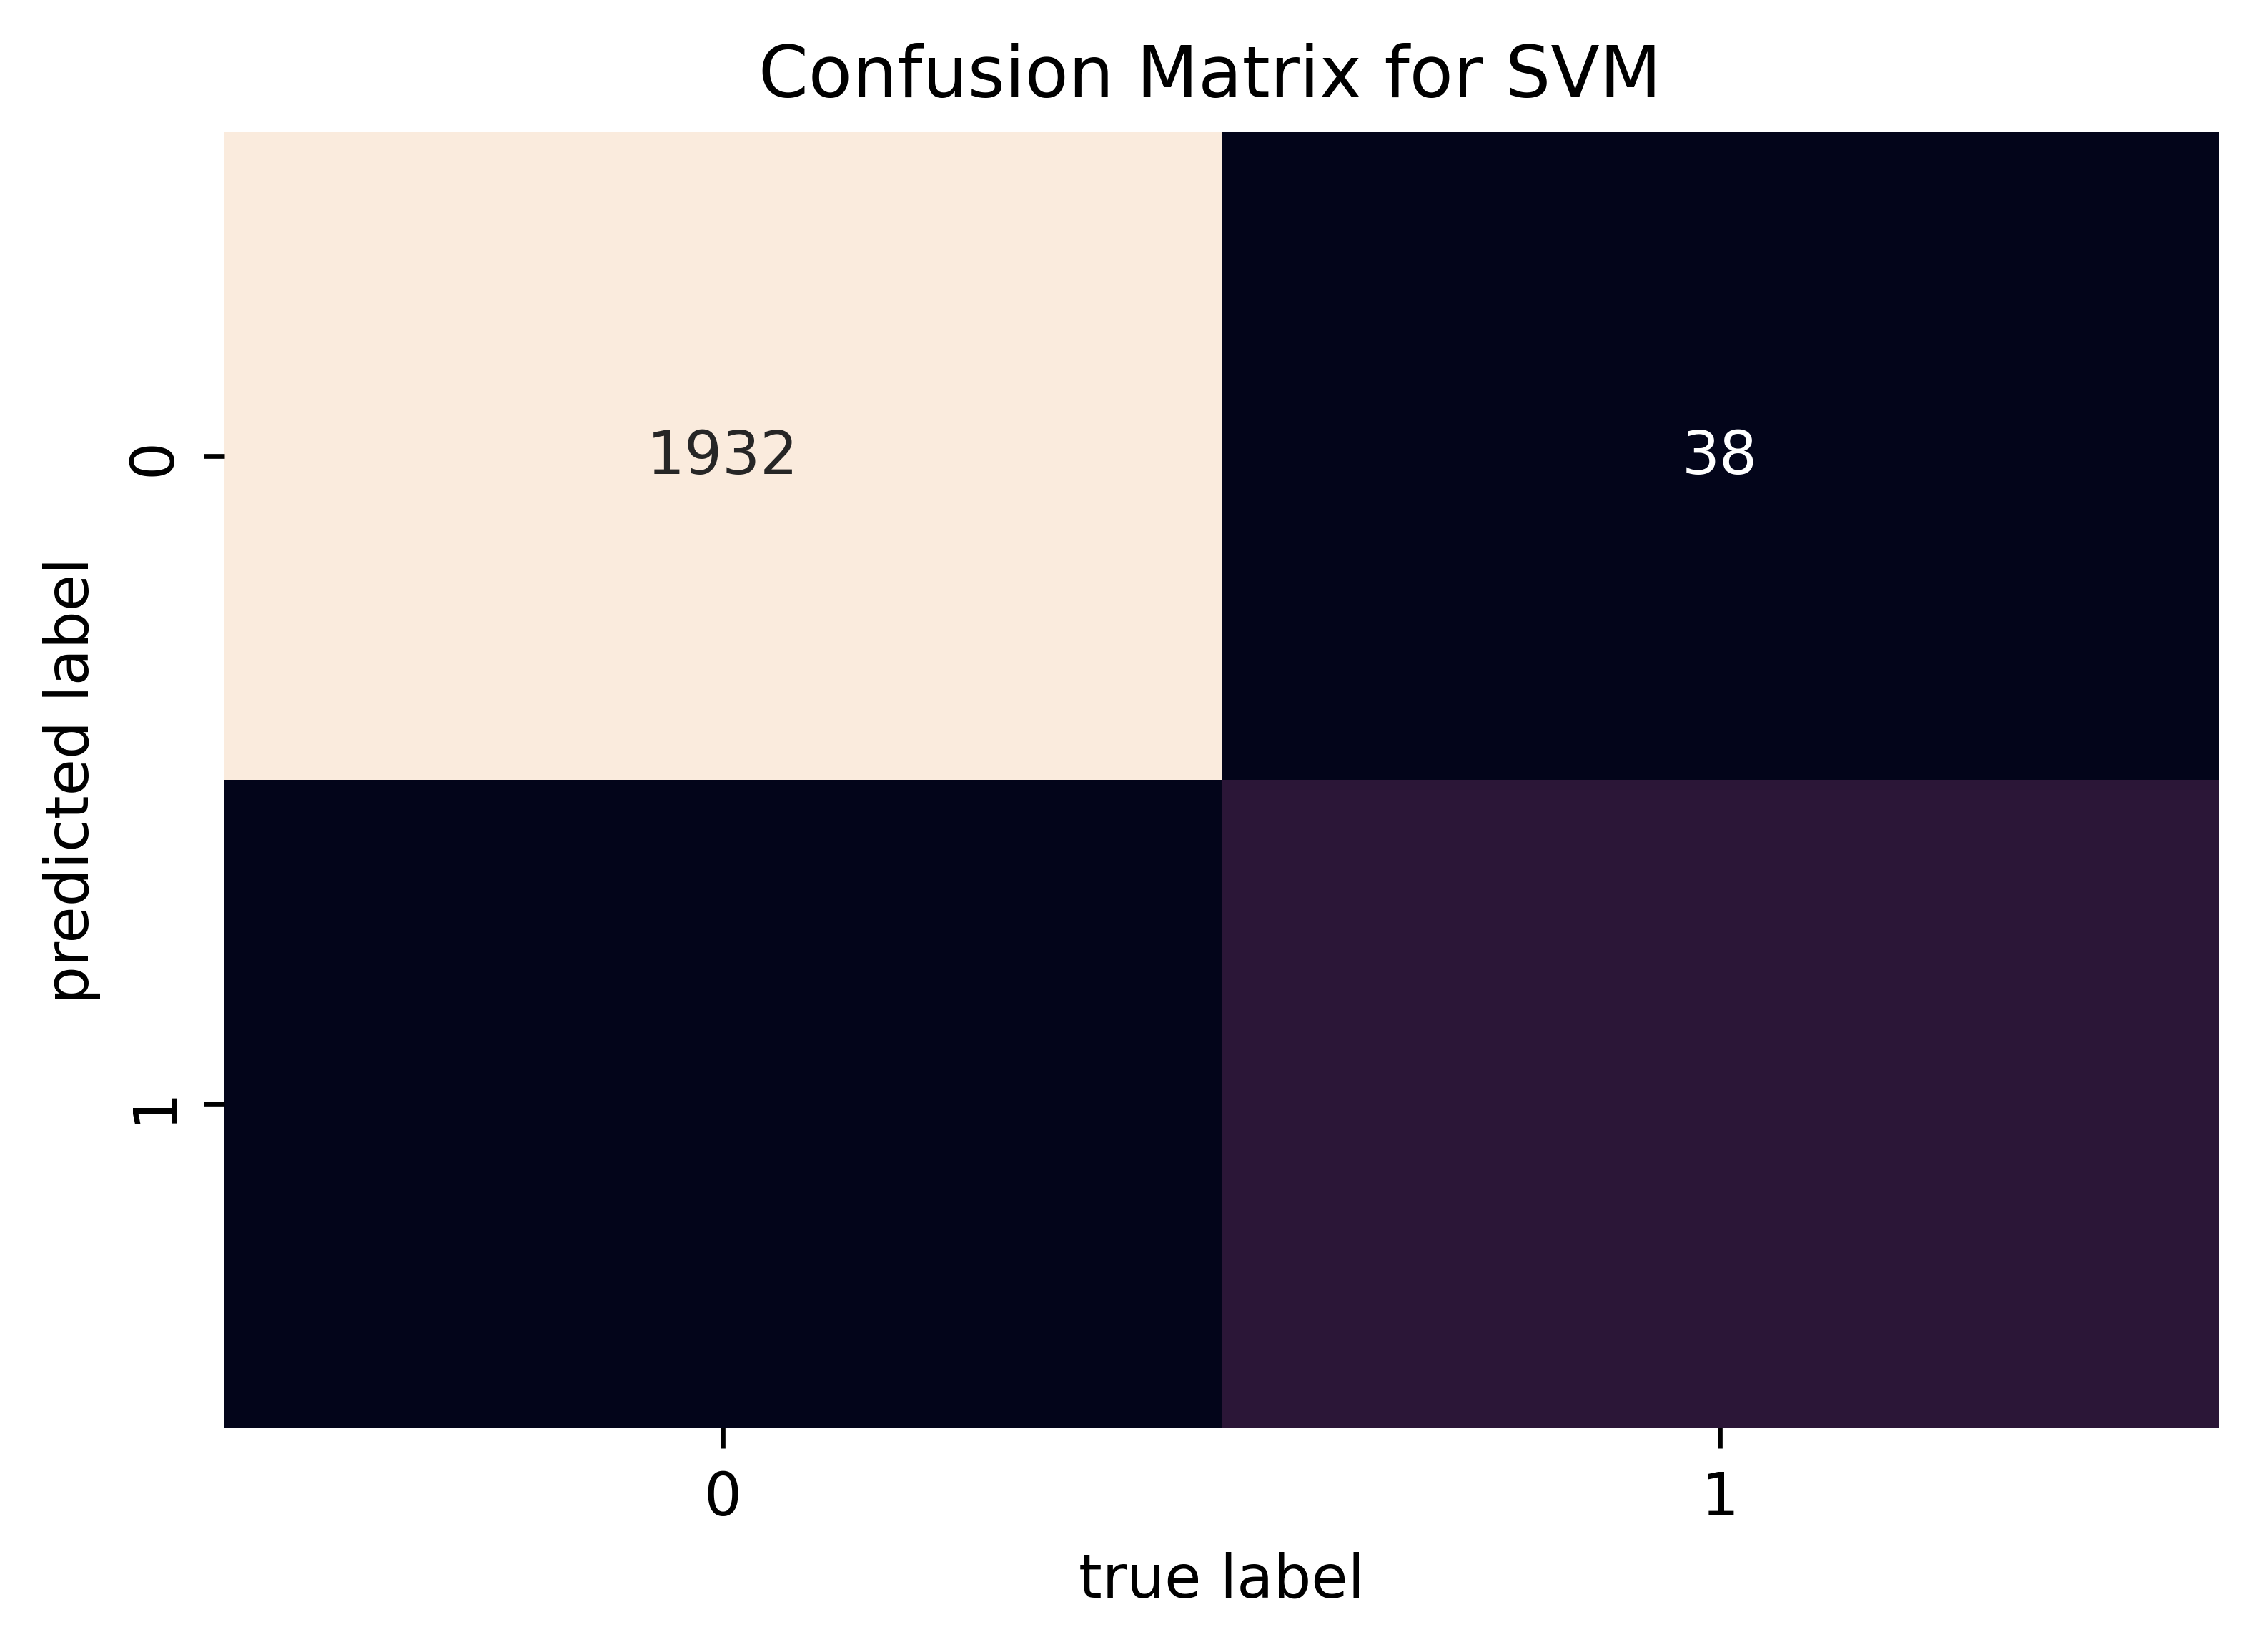

In [18]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=600)
mat = confusion_matrix(y_test,y_pred_svm)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for SVM ')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("confusion_matrix.png")
plt.show()

In [19]:
import statsmodels.api as sm

ols = sm.OLS(y_test,y_pred_svm)
ols_result = ols.fit()
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.742
Model:                            OLS   Adj. R-squared (uncentered):              0.742
Method:                 Least Squares   F-statistic:                              6531.
Date:                Thu, 28 Mar 2024   Prob (F-statistic):                        0.00
Time:                        15:50:51   Log-Likelihood:                          640.71
No. Observations:                2269   AIC:                                     -1279.
Df Residuals:                    2268   BIC:                                     -1274.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8528      0.011     80.813      0.000       0.832       0.874
==============================================================================
Omnibus:                      693.870   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44145.159
Skew:                           0.569   Prob(JB):                         0.00
Kurtosis:                      24.579   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
import pickle

In [21]:
file="svm_model.pkl"
fileobj=open(file,'wb')
pickle.dump(svm,fileobj)
fileobj.close()

In [22]:
file="svm_model.pkl"
fileobj=open(file,'rb')
mp=pickle.load(fileobj)
print(mp)

SVC(kernel='linear', probability=True)


In [26]:


tex=[]
s=input("enter tweet")
tex.append(s)
#initializing the countvectorizer 
vectorizer=CountVectorizer()

#tokenize and make the document into a matrix 
document_term_matrix=vectorizer.fit_transform(tex)

# Get feature names
try:
    # For scikit-learn version 0.24.0 or later
    feature_names = vectorizer.get_feature_names_out()
except AttributeError:
    # For older versions
    feature_names = vectorizer.get_feature_names()

# Check the result
pd.DataFrame(document_term_matrix.toarray(), columns=feature_names)
vectorizer = CountVectorizer(binary=True, stop_words='english')

# learn a vocabulary dictionary of all tokens in the raw documents
vectorizer.fit(list(x_train) + list(x_test))



# transform documents to document-term matrix
hi = vectorizer.transform(tex)
x_test_vec = vectorizer.transform(x_test)
y_pred = mp.predict(hi)
print(y_pred)

[0]
